In [3]:
import os
import glob
import sys
import numpy as np
import math
from scipy.stats import norm
from astropy.stats import median_absolute_deviation as mad
from astropy.io import fits
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

def gaussian(x, a, mean, sigma):
    return a * np.exp(-((x - mean)**2 / (2 * sigma**2)))

def sqrt(x, sigma0):
    return sigma0 / np.sqrt(x)

def varsort(item):
return int(item.split("_SSAMP")[1].split("_")[0])


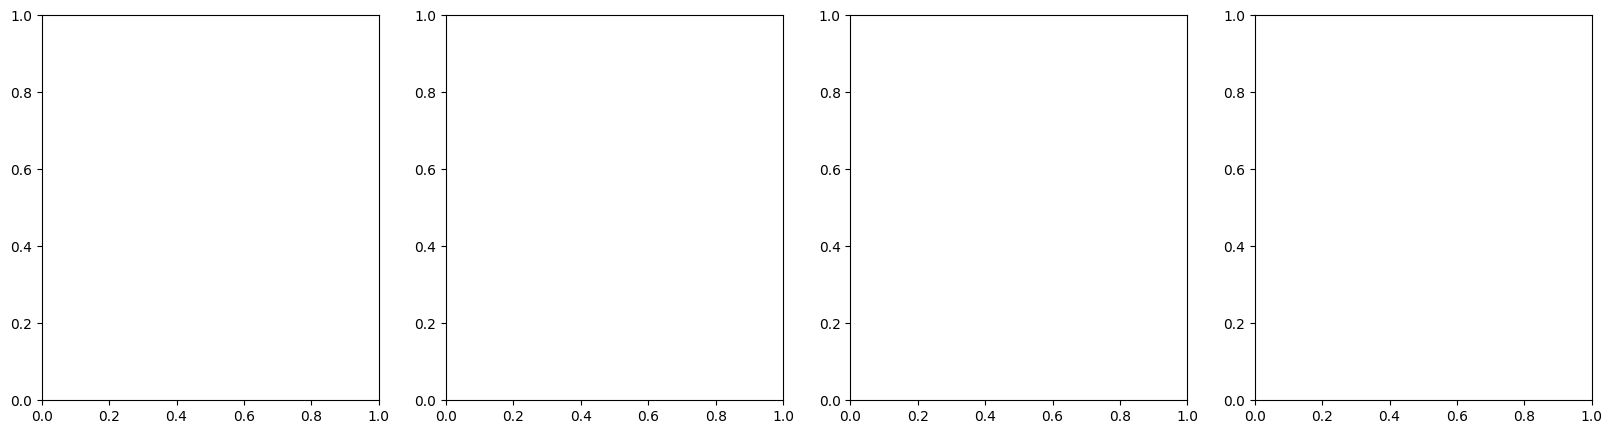

In [4]:
active_mask = np.s_[:, 9:538]#   9 <= x < 538
overscan_mask = np.s_[:, 538:]# 538 <= x

mask=np.s_[:, :]# Area where variable will be computed

list_var=[]# List to store the computed variable

#xmin_fit, xmax_fit = -200, 200# Variables to perform the fit
expgain = [191, 191, 193, 158]

fig_all, axs_all = plt.subplots(1, 4, figsize=(20, 5))# Define figure to stack histograms of all images
#fig_all.tight_layout()

#fig_all, axs_all = plt.subplots(1, 4, figsize=(20, 5))# Define figure to stack histogram of each image
#fig_all.tight_layout()

#print(image)
image="/home/maumtz/datosFits/testMITLL/16NOV22/proc_skp_module26_MITLL01_externalVr_Vtest_T170_testLeakage__NSAMP324_NROW50_NCOL700_EXPOSURE0_NBINROW1_NBINCOL1_img37.fits"
hdul=fits.open(image)
#hdul.info()
img=os.path.basename(image)# Get basename of image


# Extract info from img title
#string=image.split("img")[1].split(".")[0]# To obtain imgID

var=[]
var_fit=[]

#for i in range(0,1):
data=hdul[0].data
header=hdul[0].header
figctr=0

if data is not None:# Check if data is not empty
    print("data ok")

    #data = data - np.median(data, axis=0, keepdims=True)# Subtract median per column
    #data = data - np.median(data[overscan_mask], axis=1, keepdims=True)# Subtract OS median per row

    # Extract info from header
    string='RUNID'
    stringval=header[string]
    nsamp=float(header['RUNID'])

    #hlabel = string+" "+stringval# Define label of histogram
    hlabel = img

    #Plot histogram of data to obtain offset
    hist, bin_edges = np.histogram(data[mask].flatten(), bins=1000000)

    print("hist Ok")



    offset = bin_edges[np.argmax(hist)]
    #print(offset)
    data = data-offset# Subtract offset from data
    #offset = 0

    bin_heights, bin_borders, _ = axs_all[figctr].hist(data[mask].flatten(), range=[offset-1500, offset+1500], bins=100, histtype='step', label=hlabel)
    offset_fit = bin_borders[np.argmax(bin_heights)]
    axs_all[figctr].set_title('ext '+str(figctr+1))
    handles_all, labels_all = axs_all[figctr].get_legend_handles_labels()

    bin_centers=np.zeros(len(bin_heights), dtype=float)# Compute centers of each bin
    for p in range(len(bin_heights)):
        bin_centers[p]=(bin_borders[p+1]+bin_borders[p])/2

    xmin_fit, xmax_fit = offset_fit-(10*expgain[figctr])/math.sqrt(nsamp), offset_fit+(10*expgain[figctr])/math.sqrt(nsamp)# Define fit range
    bin_heights = bin_heights[(bin_centers>xmin_fit) & (bin_centers<xmax_fit)]
    bin_centers = bin_centers[(bin_centers>xmin_fit) & (bin_centers<xmax_fit)]

    #popt, pcov = curve_fit(gaussian, bin_centers, bin_heights, p0=[np.max(bin_heights), 0, var[figctr]], maxfev=100000)# Fit histogram with gaussian
    popt, pcov = curve_fit(gaussian, bin_centers, bin_heights, p0=[np.max(bin_heights), 0, expgain[figctr]], maxfev=100000)# Fit histogram with gaussian
    axs_all[figctr].plot(bin_centers, gaussian(bin_centers, *popt))# Plot gaussian fit
    #print(popt)



    #var_fit.append(abs(popt[2])/float(stringval))
    var_fit.append(abs(popt[2])/float(expgain[figctr]))

    #var.append(np.std(data[mask])/float(stringval))# Standard deviation
    var.append(np.std(data[mask])/float(expgain[figctr]))# Standard deviation
    #var.append(np.mean(data[mask]))# Mean
    #var.append(np.median(data[mask]))# Median

    figctr=figctr+1

plt.legend()
plt.show()# Show histogram per image

# STORE COMPUTED VARIABLE
# print(float(stringval), var[0], var[1], var[2], var[3])
# print(float(stringval), var_fit[0], var_fit[1], var_fit[2], var_fit[3])
# #list_var.append([float(stringval), var[0], var[1], var[2], var[3]])
# list_var.append([float(stringval), var_fit[0], var_fit[1], var_fit[2], var_fit[3]])# To use the var obtained from the gaussian fit


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


data ok
hist Ok


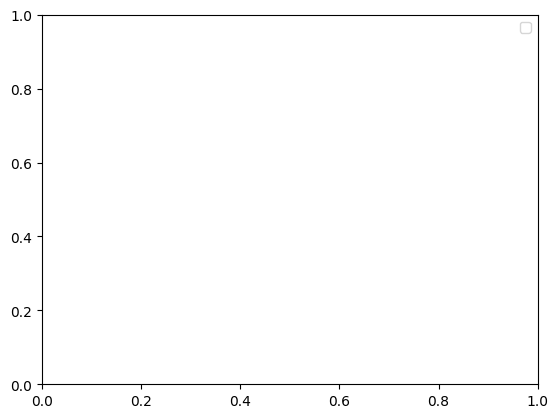

In [17]:

# Extract info from img title
#string=image.split("img")[1].split(".")[0]# To obtain imgID

var=[]
var_fit=[]

#for i in range(0,1):
data=hdul[0].data
header=hdul[0].header
figctr=0

if data is not None:# Check if data is not empty
    print("data ok")

    #data = data - np.median(data, axis=0, keepdims=True)# Subtract median per column
    #data = data - np.median(data[overscan_mask], axis=1, keepdims=True)# Subtract OS median per row

    # Extract info from header
    string='RUNID'
    stringval=header[string]
    nsamp=float(header['RUNID'])

    #hlabel = string+" "+stringval# Define label of histogram
    hlabel = img

    #Plot histogram of data to obtain offset
    hist, bin_edges = np.histogram(data[mask].flatten(), bins=1000000)

    print("hist Ok")



    offset = bin_edges[np.argmax(hist)]
    #print(offset)
    data = data-offset# Subtract offset from data
    #offset = 0

    bin_heights, bin_borders, _ = axs_all[figctr].hist(data[mask].flatten(), range=[offset-1500, offset+1500], bins=100, histtype='step', label=hlabel)
    offset_fit = bin_borders[np.argmax(bin_heights)]
    axs_all[figctr].set_title('ext '+str(figctr+1))
    handles_all, labels_all = axs_all[figctr].get_legend_handles_labels()

    bin_centers=np.zeros(len(bin_heights), dtype=float)# Compute centers of each bin
    for p in range(len(bin_heights)):
        bin_centers[p]=(bin_borders[p+1]+bin_borders[p])/2

    xmin_fit, xmax_fit = offset_fit-(10*expgain[figctr])/math.sqrt(nsamp), offset_fit+(10*expgain[figctr])/math.sqrt(nsamp)# Define fit range
    bin_heights = bin_heights[(bin_centers>xmin_fit) & (bin_centers<xmax_fit)]
    bin_centers = bin_centers[(bin_centers>xmin_fit) & (bin_centers<xmax_fit)]

    #popt, pcov = curve_fit(gaussian, bin_centers, bin_heights, p0=[np.max(bin_heights), 0, var[figctr]], maxfev=100000)# Fit histogram with gaussian
    popt, pcov = curve_fit(gaussian, bin_centers, bin_heights, p0=[np.max(bin_heights), 0, expgain[figctr]], maxfev=100000)# Fit histogram with gaussian
    axs_all[figctr].plot(bin_centers, gaussian(bin_centers, *popt))# Plot gaussian fit
    #print(popt)



    #var_fit.append(abs(popt[2])/float(stringval))
    var_fit.append(abs(popt[2])/float(expgain[figctr]))

    #var.append(np.std(data[mask])/float(stringval))# Standard deviation
    var.append(np.std(data[mask])/float(expgain[figctr]))# Standard deviation
    #var.append(np.mean(data[mask]))# Mean
    #var.append(np.median(data[mask]))# Median

    figctr=figctr+1

plt.legend()
plt.show()# Show histogram per image

# STORE COMPUTED VARIABLE
# print(float(stringval), var[0], var[1], var[2], var[3])
# print(float(stringval), var_fit[0], var_fit[1], var_fit[2], var_fit[3])
# #list_var.append([float(stringval), var[0], var[1], var[2], var[3]])
# list_var.append([float(stringval), var_fit[0], var_fit[1], var_fit[2], var_fit[3]])# To use the var obtained from the gaussian fit


In [ ]:

arr_var=np.array(list_var)
arr_var=arr_var[np.argsort(arr_var[:, 0])]# Sort array by values on first column
#print(arr_var)

fig_all.legend(handles_all, labels_all, loc='upper right')
#plt.legend()
plt.show()

# PLOT
fig_var, axs_var = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
#fig_var.tight_layout()